In [19]:
def Compute_Theta_B(Lam, B1, B2):
    Theta=np.einsum("a,aib->aib",Lam,B1)
    Theta=np.einsum("aib,bjc->aijc",Theta,B2)
    return Theta

def apply_two_site_unitary(Lam, B1, B2,U,chis,j):
    Theta = Compute_Theta_B(Lam, B1, B2)

    Theta = np.einsum("ijkl,aijb->aklb",U,Theta)
    Theta = Theta.reshape(chis[j]*d,chis[j+2]*d)         

    Sigma,lam_1,Ve=truncate(j,Theta,chis,L,d=2)

    vi=np.divide(1.0, Lam, out=np.zeros_like(Lam), where=np.abs(Lam)>=1E-14)

    B1 = np.einsum("a,aib->aib",vi,Sigma) 
    B1 = np.einsum("aib,b->aib",B1,lam_1)  

    B2 = Ve 
    
    return Lam,lam_1, B1, B2

def Entr(lam):
    N = len(lam)
    Ent = 0. 
    for j in range(N):
        Ent += -np.log(lam[j])*np.log(lam[j])
    return Ent

[1 2 4 2 1]


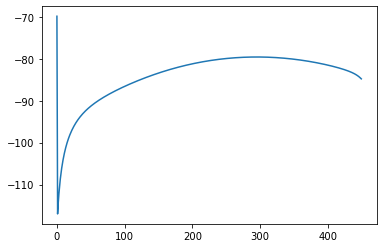

In [21]:
import numpy as np
from Library import Convert_to_A_and_B, ka, truncate, Create_random_MPS, Pauli, Model_coefficients, Create_Hamiltonina
from quspin.basis import spin_basis_general # Hilbert space spin basis
import matplotlib.pyplot as plt
from scipy.linalg import expm
T = 2.5*2    # total time
N = 75*6     # Number of updates
dt = T/N       # time step

d = 2
L = 4        # system size
chi = 20              # Bond dimension
d = 2                                  # Dimension of physical index
h_x, h_y, h_z = np.sqrt(3) , np.log(2), 0.  # Field in the different directions
J_xx, J_yy, J_zz = 0., 0., 0.29  # Strength of spin interactions
chis = ka(L,chi)
print(chis)
Entropy = np.zeros(N)
Model = [["z"],["x","y"]]     # The first part of the model gives us the spin interaction and the second one the fields
Interactions, Fields = Model_coefficients(J_xx,J_yy,J_zz,h_x,h_y,h_z)
S_z, S_x, S_y, S1 = Pauli()

Gamma,Lambda = Create_random_MPS(L,chis)

_, B = Convert_to_A_and_B(Gamma, Lambda,L)


H  = Create_Hamiltonina(Model,S1,Interactions,Fields,d)

# Time evolution operator
U=expm(-1j*dt*H.reshape(d**2,-1)).reshape(d,d,d,d)
for ty in range(N):
  for j in range(1,L-1,2):
    Lambda[j], Lambda[j+1], B[j+1], B[j+2] = apply_two_site_unitary(Lambda[j], B[j+1], B[j+2],U,chis,j)

  for j in range(0,L,2):
    Lambda[j], Lambda[j+1], B[j+1], B[j+2] = apply_two_site_unitary(Lambda[j], B[j+1], B[j+2],U,chis,j)
  Entropy[ty] = Entr(Lambda[len(Lambda)//2])
#Mz_iTEBD = np.zeros(N+1).astype(data_type)
#Mz_iTEBD[0] = Exp_value_two_site(lam[0],Gamma[0],lam[1],Gamma[1],S_z,S_z)
plt.plot(Entropy)


In [5]:
for j in range(0,6,2):
    print(j)

0
2
4
